David Kercher, Nov 17, 2021

Let A be the N x N bidiagonal matrix with $a_{k, k+1} = a_{k,k} = k^{-1/2}$, $N = 64$. ( in the limit N goes to infinity, A becomes a non-self-adjoint compact operator.)

Starting from a random initial vector, run the Arnoldi iterations and compute Ritz values at steps n = 1,2,...30. Produce plots to indicate the rates of convergence to eigenvalues of A, and comment on your results.

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def arnoldi(A):
    N = len(A)
    Q = np.zeros((N,N+1))
    H = np.zeros((N+1,N))
    b = np.random.rand(N) # random vector
    eigs = []
    Q.T[0] = b / np.linalg.norm(b)
    
    for n in range(30):
        v = A @ Q.T[n]
        
        for j in range(n):
            H[j][n] = Q.T[j]@v
            v = v - H[j][n] *Q.T[j]
        
        H[n+1][n] = np.linalg.norm(v)
        Q.T[n+1] = v / H[n+1][n]
        
        eigs.append(np.linalg.eigvals(H[:n].T[:n]))
    
    return np.real(eigs)

In [44]:
N = 64
A = np.zeros((N,N))
for i in range(N):
    A[i][i] = (1+i)**(-1/2)
    if i != N-1:
        A[i][i+1] = (1+i)**(-1/2)

eigs = arnoldi(A)

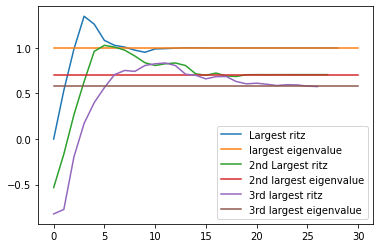

In [45]:
# Note: Compared largest, second largest, third largest ritz values to corresponding eigenvalues
# Below is another graph with the first, second, third ritz values found relative to largest eigenvalues
# It was found that sometimes the ritz values would not be the 1st, 2nd, 3rd largest ritz values as we would like to be in order
# Plot the largest eigenvalue found from Arnoldi relative to largest eigenvalue of A (the largest ritz)
e_1 = [np.max(eigs[i]) for i in range(1,len(eigs))]
plt.plot(e_1,label="Largest ritz")
plt.plot([0,30],[1,1], label="largest eigenvalue") # Comparing to largest eigenvalue of A

# Plot the largest eigenvalue found from Arnoldi relative to largest eigenvalue of A (the second largest ritz value)
e_2 = [np.partition(eigs[i], -2)[-2] for i in range(2,len(eigs))]
plt.plot(e_2,label="2nd Largest ritz")
plt.plot([0,30],[0.707,0.707], label="2nd largest eigenvalue") # Comparing to second largest eigenvalue of A

# Plot the largest eigenvalue found from Arnoldi relative to largest eigenvalue of A (the third largest ritz value)
e_3 = [np.partition(eigs[i], -3)[-3] for i in range(3,len(eigs))]
plt.plot(e_3, label="3rd largest ritz")
plt.plot([0,30],[0.5773,0.5773], label="3rd largest eigenvalue") # Comparing to third largest eigenvalue of A

plt.legend()

Convergence: The above plot shows the convergence of ritz values to eigenvalues.  We only took the largest 3 ritz/eigenvalues, this can be shown for all of them (I believe it was noted in class that we only needed to show it with the first couple largest eigenvalues. This process can easily be repeated for other values, just not nearly clean to look at. Below I did the same process, but insteal of taking 1st, 2nd, 3rd largest ritz values I compared the eigenvalues to the 1st, 2nd, 3rd ritz values that were found. This showed that the nth ritz value does not always correspond to the nth largest eigenvalue (although most of the time it did).

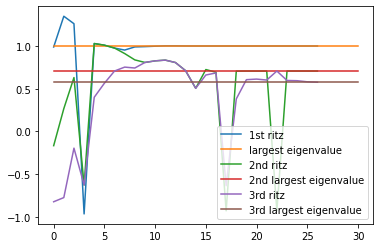

In [46]:
# Plot 1st, 2nd, 3rd Ritz value found. Note these did not always align with the largest, second largest,.. eigenvalues as above.
# Sometimes the second ritz value would be the largest eigenvalue, or the third largest eigenvalue
# Plot the largest eigenvalue found from Arnoldi relative to largest eigenvalue of A (the first ritz)
e_1 = [eigs[i][0] for i in range(3,len(eigs))]
plt.plot(e_1,label="1st ritz")
plt.plot([0,30],[1,1], label="largest eigenvalue") # Comparing to largest eigenvalue of A

# Plot the largest eigenvalue found from Arnoldi relative to largest eigenvalue of A (the second ritz value)
e_2 = [eigs[i][1] for i in range(3,len(eigs))]
plt.plot(e_2,label="2nd ritz")
plt.plot([0,30],[0.707,0.707], label="2nd largest eigenvalue") # Comparing to second largest eigenvalue of A

# Plot the largest eigenvalue found from Arnoldi relative to largest eigenvalue of A (the third ritz value)
e_3 = [eigs[i][2] for i in range(3,len(eigs))]
plt.plot(e_3, label="3rd ritz")
plt.plot([0,30],[0.5773,0.5773], label="3rd largest eigenvalue") # Comparing to third largest eigenvalue of A

plt.legend()

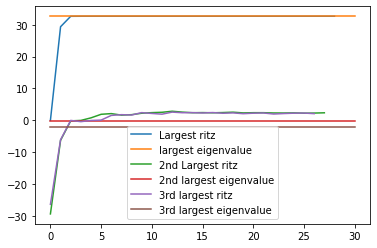

In [47]:
# For an abitrary matrix A
# (note the ritz values will account for complex eigenvalues but that is not reflected in the code below)
A = np.random.rand(64,64)
eigs = arnoldi(A)

# Note: Compared largest, second largest, third largest ritz values to corresponding eigenvalues
# Below is another graph with the first, second, third ritz values found relative to largest eigenvalues
# It was found that sometimes the ritz values would not be the 1st, 2nd, 3rd largest ritz values as we would like to be in order
# Plot the largest eigenvalue found from Arnoldi relative to largest eigenvalue of A (the largest ritz)
e_1 = [np.max(eigs[i]) for i in range(1,len(eigs))]
eigvals = np.real(np.linalg.eigvals(A))
plt.plot(e_1,label="Largest ritz")
plt.plot([0,30], [np.max(eigvals), np.max(eigvals)], label="largest eigenvalue") # Comparing to largest eigenvalue of A

# Plot the largest eigenvalue found from Arnoldi relative to largest eigenvalue of A (the second largest ritz value)
e_2 = [np.partition(eigs[i], -2)[-2] for i in range(2,len(eigs))]
plt.plot(e_2,label="2nd Largest ritz")
plt.plot([0,30], [np.partition(eigvals,-2)[2], np.partition(eigvals,-2)[2]], label="2nd largest eigenvalue") # Comparing to second largest eigenvalue of A

# Plot the largest eigenvalue found from Arnoldi relative to largest eigenvalue of A (the third largest ritz value)
e_3 = [np.partition(eigs[i], -3)[-3] for i in range(3,len(eigs))]
plt.plot(e_3, label="3rd largest ritz")
plt.plot([0,30],[np.partition(eigvals,-3)[3], np.partition(eigvals,-3)[3]], label="3rd largest eigenvalue") # Comparing to third largest eigenvalue of A

plt.legend()